# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
import pprint

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
api_key=api_key
#url
url ="http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="

# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
city=[]
country=[]
date=[]


# loop throught the list of units and append them to temperatures list
for x in cities:
    x = x.replace(' ', '%20')
    response = requests.get(query_url + x).json()

    if response['cod'] == 200:
        print('City Name: ' + response['name'])
        print('City Id: ' + str(response['id']))

        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append((response['main']['temp_max'] - 273.15) * (9/5) + 32)
        wind_speed.append(response['wind']['speed'])
    else:
        print('City Data is not found')
    print('-------------------------------------------')



City Data is not found
-------------------------------------------
City Name: Busselton
City Id: 2075265
-------------------------------------------
City Name: Antibes
City Id: 3037456
-------------------------------------------
City Name: Jamestown
City Id: 2069194
-------------------------------------------
City Name: Grand-Santi
City Id: 3381538
-------------------------------------------
City Name: Hermanus
City Id: 3366880
-------------------------------------------
City Name: Devonport
City Id: 2168943
-------------------------------------------
City Name: Broome
City Id: 2656067
-------------------------------------------
City Name: Sitka
City Id: 4267710
-------------------------------------------
City Name: Uruguaiana
City Id: 3445679
-------------------------------------------
City Name: Vila
City Id: 3164565
-------------------------------------------
City Name: Sidi Ali
City Id: 2487130
-------------------------------------------
City Data is not found
---------------------

City Data is not found
-------------------------------------------
City Data is not found
-------------------------------------------
City Data is not found
-------------------------------------------
City Name: Thanh Hoa
City Id: 1574023
-------------------------------------------
City Name: Luderitz
City Id: 3355672
-------------------------------------------
City Name: Kruisfontein
City Id: 986717
-------------------------------------------
City Name: Bilma
City Id: 2446796
-------------------------------------------
City Name: Elizabeth City
City Id: 4465088
-------------------------------------------
City Name: San Buenaventura
City Id: 3987500
-------------------------------------------
City Name: Castro
City Id: 3896218
-------------------------------------------
City Name: Saskylakh
City Id: 2017155
-------------------------------------------
City Name: Wiarton
City Id: 6186122
-------------------------------------------
City Name: Xapuri
City Id: 3924674
----------------------

City Name: Keita
City Id: 2327546
-------------------------------------------
City Data is not found
-------------------------------------------
City Name: Mulege
City Id: 3995236
-------------------------------------------
City Name: Manchar
City Id: 1263937
-------------------------------------------
City Name: Monrovia
City Id: 2274895
-------------------------------------------
City Name: Airai
City Id: 1651810
-------------------------------------------
City Name: Mahebourg
City Id: 934322
-------------------------------------------
City Name: Ahipara
City Id: 2194098
-------------------------------------------
City Name: Petropavlovskoye
City Id: 2127154
-------------------------------------------
City Name: Faanui
City Id: 4034551
-------------------------------------------
City Name: Oktyabrskoye
City Id: 1511846
-------------------------------------------
City Name: Cam Ranh
City Id: 1586350
-------------------------------------------
City Name: Sabang
City Id: 1691355
-------

City Name: Narsaq
City Id: 3421719
-------------------------------------------
City Name: Santa Fe do Sul
City Id: 3450232
-------------------------------------------
City Name: Taree
City Id: 2147381
-------------------------------------------
City Name: Padang
City Id: 1633419
-------------------------------------------
City Name: Ler
City Id: 3146125
-------------------------------------------
City Name: Amurzet
City Id: 2027740
-------------------------------------------
City Name: Coracora
City Id: 3942259
-------------------------------------------
City Data is not found
-------------------------------------------
City Name: Nabire
City Id: 1634614
-------------------------------------------
City Name: Aasiaat
City Id: 3424901
-------------------------------------------
City Name: Kikwit
City Id: 2314705
-------------------------------------------
City Name: Otjiwarongo
City Id: 3353811
-------------------------------------------
City Name: Ketchikan
City Id: 5554428
------------

City Name: Queimadas
City Id: 3391040
-------------------------------------------
City Name: Takestan
City Id: 113491
-------------------------------------------
City Name: Isaka
City Id: 2311968
-------------------------------------------
City Name: Zurrieq
City Id: 2562250
-------------------------------------------
City Name: Gornopravdinsk
City Id: 1506268
-------------------------------------------
City Name: Vrangel
City Id: 2013258
-------------------------------------------
City Name: Kuala Terengganu
City Id: 1734705
-------------------------------------------
City Name: Miguel Auza
City Id: 3995943
-------------------------------------------
City Name: Kathu
City Id: 991664
-------------------------------------------
City Name: Santa Cruz del Sur
City Id: 3537840
-------------------------------------------
City Name: Bonavista
City Id: 5905393
-------------------------------------------
City Name: Neiafu
City Id: 4032420
-------------------------------------------
City Name: 

City Name: Mount Hagen
City Id: 2090409
-------------------------------------------
City Name: Tacna
City Id: 3928128
-------------------------------------------
City Name: Tilichiki
City Id: 2120591
-------------------------------------------
City Data is not found
-------------------------------------------
City Name: Herdecke
City Id: 2906152
-------------------------------------------
City Name: Kindu
City Id: 212902
-------------------------------------------
City Name: Dabat
City Id: 340358
-------------------------------------------
City Name: Sayyan
City Id: 70979
-------------------------------------------
City Name: Smithers
City Id: 6149996
-------------------------------------------
City Data is not found
-------------------------------------------
City Name: Beringovskiy
City Id: 2126710
-------------------------------------------
City Name: Lincoln
City Id: 5072006
-------------------------------------------
City Name: Demirci
City Id: 317241
-----------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {
   'City': city,
   'Cloudiness': cloudiness,
   'Country' : country,
   'Date' : date,
   'Humidity' : humidity,
   'Latitude' : lat,
   'Longitude' : lon,
   'Max Temperature (F)': max_temp,
   'Wind Speed' : wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file)

print(weather_df.head(10))

          City  Cloudiness Country        Date  Humidity  Latitude  Longitude  \
0    Busselton           0      AU  1547522965        89    -33.64     115.35   
1      Antibes           0      FR  1547521200        49     43.58       7.11   
2    Jamestown          36      AU  1547522992        41    -33.21     138.60   
3  Grand-Santi          88      GF  1547523079       100      4.27     -54.38   
4     Hermanus          24      ZA  1547523070        95    -34.42      19.24   
5    Devonport          56      AU  1547523080        77    -41.18     146.36   
6       Broome           0      GB  1547520960        93     52.47       1.45   
7        Sitka           0      US  1547523080        75     37.17     -99.65   
8   Uruguaiana          90      BR  1547521200        94    -29.77     -57.08   
9         Vila           0      IT  1547522400        41     45.18       8.40   

   Max Temperature (F)  Wind Speed  
0              70.9034        5.81  
1              46.4000        3.10

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

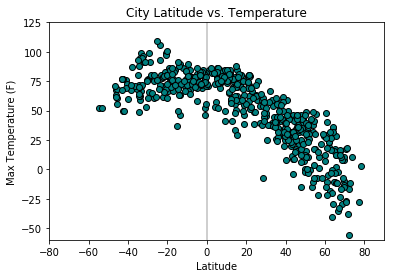

In [14]:
# Axes values
x_axis = weather_df['Latitude']
y_axis = weather_df['Max Temperature (F)']

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c='teal', edgecolors='black')

#label chart highlight the Equator
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.xlim(-80,90)
plt.ylabel('Max Temperature (F)')
plt.ylim(-60,125)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig('LatitudeVsTemperature.png')

#Show chart
plt.show()


#### Latitude vs. Humidity Plot

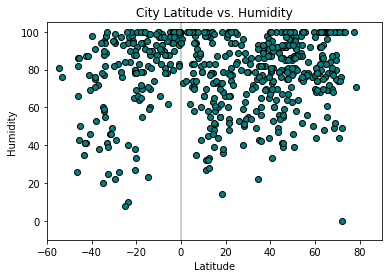

In [12]:
# Axes values
x_axis = weather_df['Latitude']
y_axis = weather_df['Humidity']

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c='teal', edgecolors='black')

#label chart highlight the Equator
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.xlim(-60,90)
plt.ylabel('Humidity')
plt.ylim(-10,105)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig('HumidityVsTemperature.png')

#Show chart
plt.show()

#### Latitude vs. Cloudiness Plot

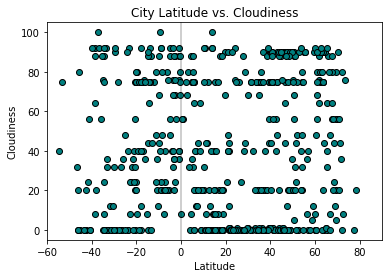

In [8]:
# Axes values
x_axis = weather_df['Latitude']
y_axis = weather_df['Cloudiness']

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c='teal', edgecolors='black')

#label chart highlight the Equator
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.xlim(-60,90)
plt.ylabel('Cloudiness')
plt.ylim(-5,105)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig('CloudinessVsTemperature.png')

#Show chart
plt.show()

#### Latitude vs. Wind Speed Plot

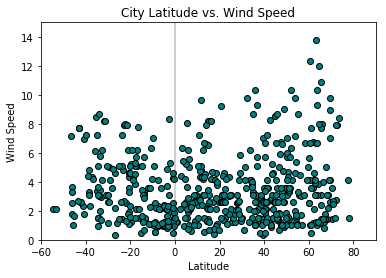

In [11]:
# Axes values
x_axis = weather_df['Latitude']
y_axis = weather_df['Wind Speed']

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c='teal', edgecolors='black')

#label chart highlight the Equator
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.xlim(-60,90)
plt.ylabel('Wind Speed')
plt.ylim(0,15)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig('Wind_SpeedVsTemperature.png')

#Show chart
plt.show()